# Classification of clients in an internet shopping mall.

Notebook 2: The data were cleaned in Notebook 1. Here we go deeper in cleaning by removing outliers and we perform a full clustering strategy.

Overall purpose of the study: \
To cluster customers in different groups with specific characteristics such as shopping habits, type of items and feature engineered characteristics.

**Implementation of functions that perform data analyses and cleaning if needed**

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Full Analysis of the dataframe
def Full_Analysis_df(data_frame,str1ng):
    Meta_df(data_frame,str1ng)
    Analysis_non_obj_df(data_frame)
    Hist_comp_non_obj_df(data_frame)
    Analysis_obj_df(data_frame)    
    return

# Analysis of the metadata of dataframe
def Meta_df(data_frame,str1ng):
    Meta_data = ((pd.DataFrame({'Filled values':pd.notnull(data_frame).sum(), 'Missing_values':pd.isnull(data_frame).sum()})
                 /(data_frame.shape[0]/100)).sort_values(by=['Missing_values'], ascending=False))
    (Meta_data.plot.bar(stacked=True,
                        figsize=(20,5),
                        title = 'Filled and missing values in % for {} with the shape {}'.format(str1ng,data_frame.shape),
                        fontsize = 14))
    return Meta_data

# Analysis of the columns containing objects
def Analysis_obj_df(data_frame):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    fig1 = plt.figure(figsize=(10, 10*Nb_col_data_frame_obj))
    icb = 1
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        plt.subplot(Nb_col_data_frame_obj,1,icb)
        data_frame_obj[col_data_frame_obj].value_counts()[:10].plot(kind='barh', 
                                                                    figsize=(10,10), 
                                                                    title = '{} with {} categories'.format(col_data_frame_obj,nb_cat_temp))
        plt.show()
        icb += 1
    return

# Analysis of the columns not containing objects
def Analysis_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object')
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    fig = plt.figure(figsize=(20, 1*Nb_col_data_frame_Nobj))
    ic = 1
    sns.set(font_scale = 1)
    for col_data_frame_Nobj in data_frame_Nobj:
        plt.subplot(Nb_col_data_frame_Nobj,1,ic)
        sns.boxplot(x=data_frame_Nobj[col_data_frame_Nobj])
        fig.subplots_adjust(hspace=2)
        ic += 1
    plt.show()
    return

# Function plotting histograms, distribution plots, mean and median for features containing numerical values
def Hist_comp_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object').dropna()
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    ih = 1
    for col_data_frame_Nobj in data_frame_Nobj:
        arr_temp = data_frame_Nobj[col_data_frame_Nobj]
        plt.figure(figsize=(6, 4))
        ax_temp = sns.distplot(arr_temp)
        plt.axvline(np.mean(arr_temp), color='b', linestyle='dashed', linewidth=3)
        plt.axvline(np.median(arr_temp), color='orange', linestyle='dashed', linewidth=3)
        plt.title('Distribution, Mean (blue), Median (orange) for the feature {}'.format(col_data_frame_Nobj))
        plt.show()
    return

# Function checking the boxplots of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Box_taget_cat(data_frame,target,cat_limit=30):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            cat_temp = sns.catplot(x=col_data_frame_obj,
                                   y=target,
                                   kind="box", 
                                   data=data_frame, 
                                   height = 4,
                                   aspect = 2)
            cat_temp.set_xticklabels(rotation=90)
            plt.show()
        else:
            continue
    return

# Function checking the mean and standard deviation of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Mean_std_target_cat(data_frame,target,cat_limit=30,fig_length=8,fig_height=4):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            list_temp = [col_data_frame_obj,target]
            mean_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).mean() 
            std_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).std()
            plt.figure(figsize=(fig_length, fig_height))
            plt.errorbar(mean_targ_cat.index, 
                         mean_targ_cat[target],
                         std_targ_cat[target], 
                         fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
            plt.xticks(rotation=90)
            plt.title('{}: Mean and Standard Dev. for each {}'.format(target,col_data_frame_obj))
        else:
            continue
    return

# Function checking the potential linear relationship between a target and features containing numerical values
def Target_Nobj_pairpl(data_frame,target):
    data_frame_Nobj = data_frame.drop(columns=target).select_dtypes(exclude='object')
    list_Nobj = list(data_frame_Nobj.columns)
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    min_list = np.arange(0,Nb_col_data_frame_Nobj,5).tolist()
    max_list = np.arange(5,Nb_col_data_frame_Nobj,5).tolist()
    l_min_list = len(min_list)
    l_max_list = len(max_list)
    if l_min_list > l_max_list:
        max_list.insert(l_min_list, Nb_col_data_frame_Nobj)
    else:
            pass
    for ia, ib in list(zip(min_list, max_list)):
#        print(ia,ib)
        pp_temp = sns.pairplot(data = data_frame,
                  y_vars=[target],
                  x_vars=list_Nobj[ia:ib], 
                  kind="reg", 
                  height = 3)    
    return

# Fonction filtering by default values between Q1-1.5IQR and Q3+1.5IQR: Outliers remover
def FilterIQR(data_frame,str1ng,kiqr=1.5):
    Q1 = data_frame[str1ng].quantile(0.25)
    Q3 = data_frame[str1ng].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (kiqr * IQR)
    high_limit = Q3 + (kiqr * IQR)
    data_frame = data_frame.drop(data_frame[(data_frame[str1ng] > high_limit) 
                                                           | (data_frame[str1ng] < low_limit)].index)
    return data_frame

['customer_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'delivered_purchase_Dtime', 'estimated_delivered_Dtime', 'customer_unique_id', 'customer_state', 'Frequency_in_month', 'geolocation_lat', 'geolocation_lng', 'review_score']


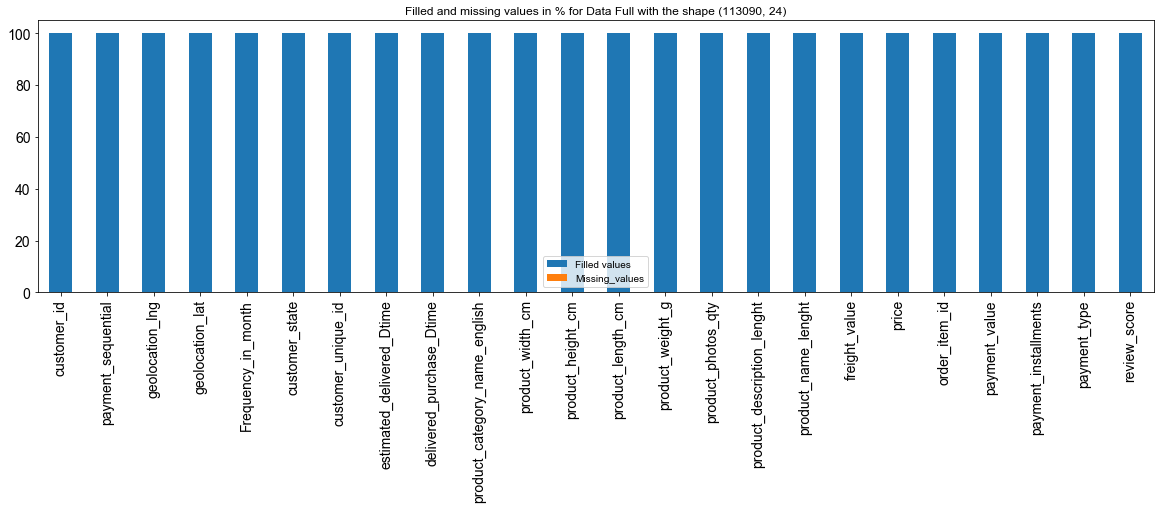

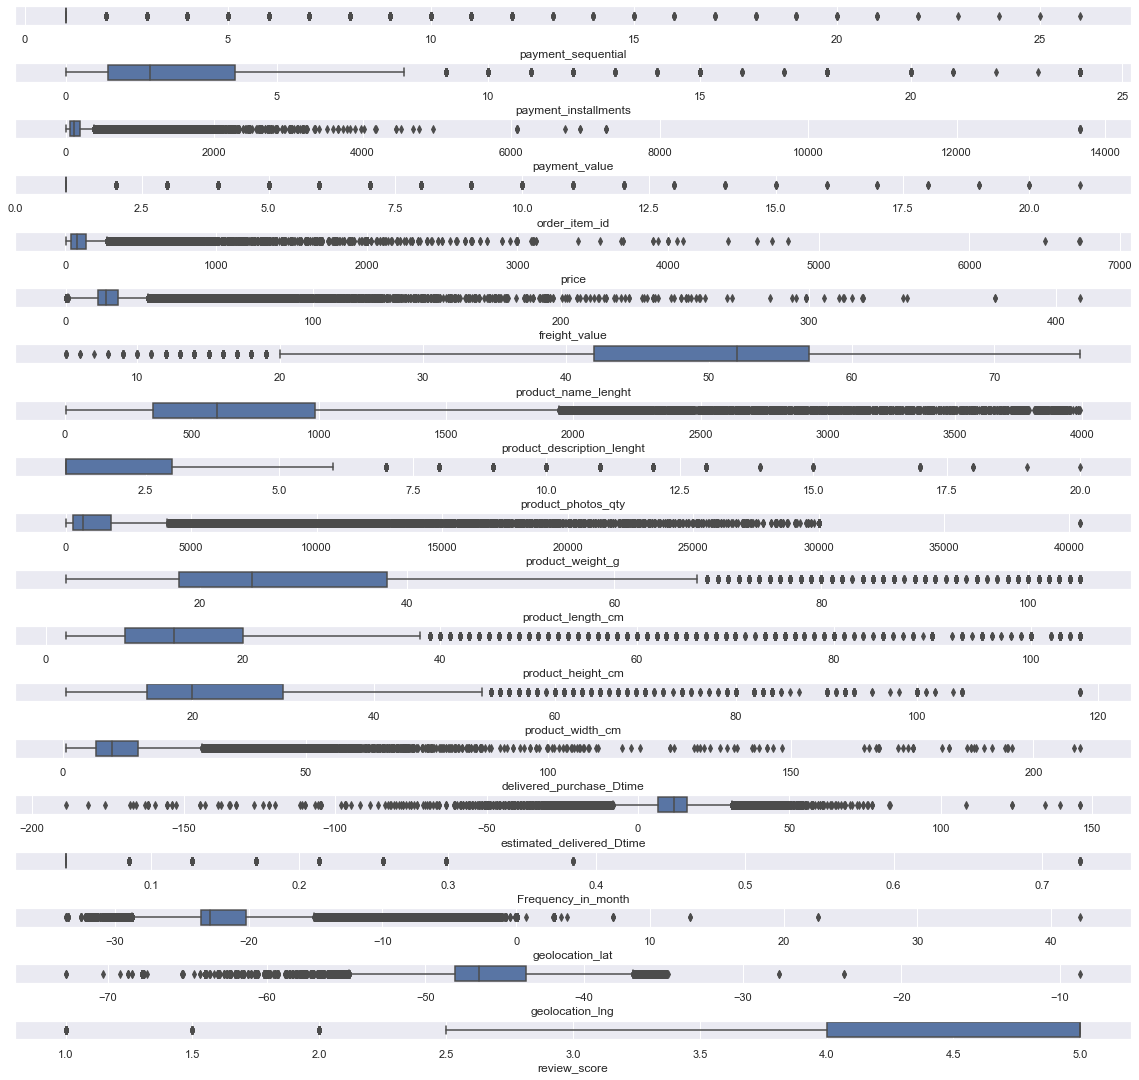

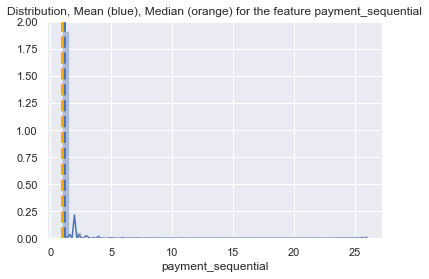

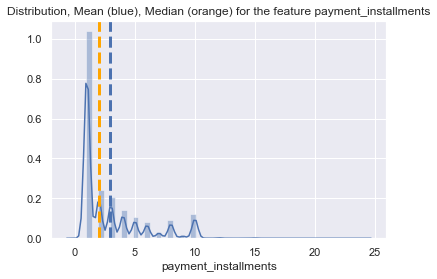

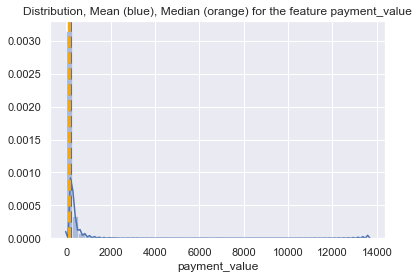

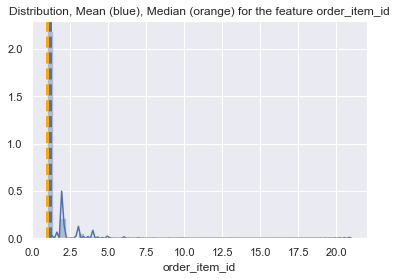

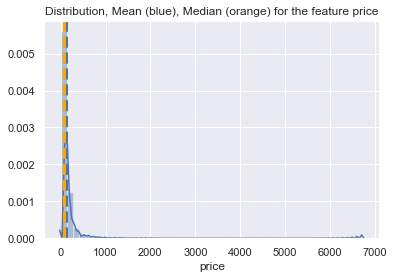

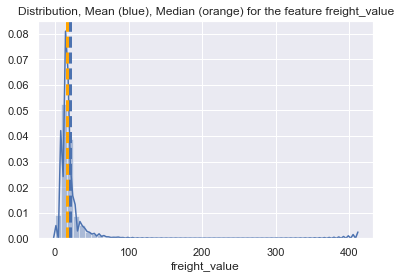

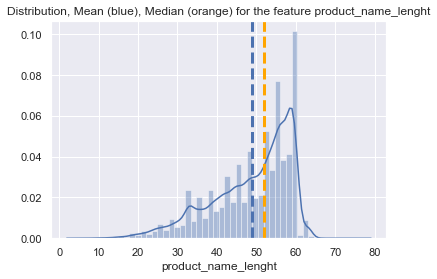

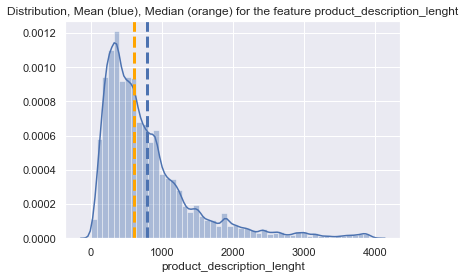

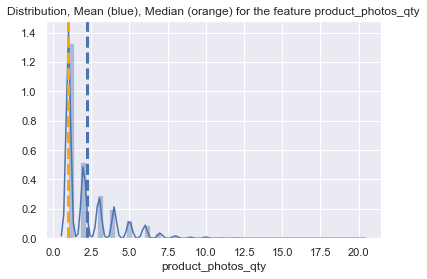

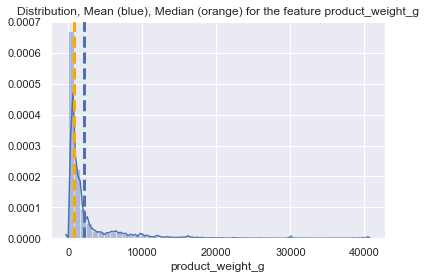

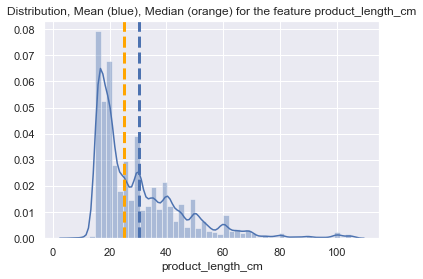

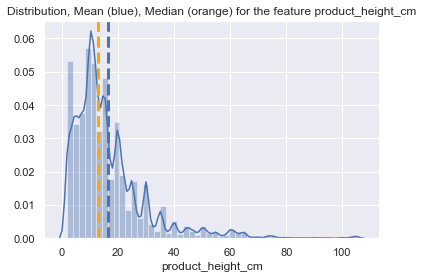

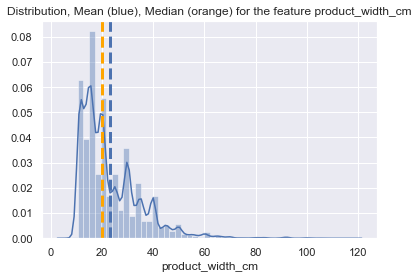

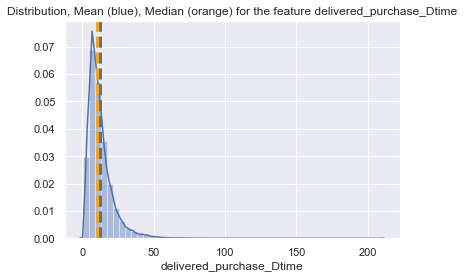

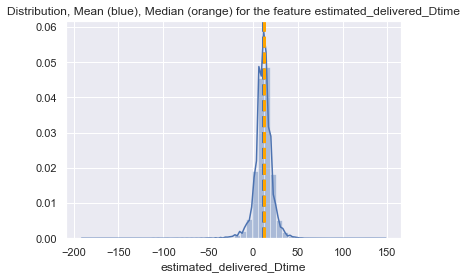

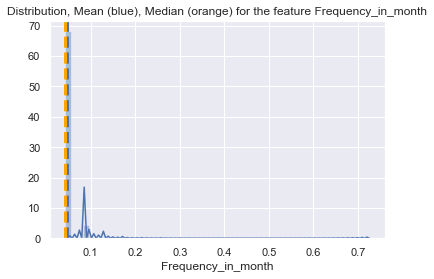

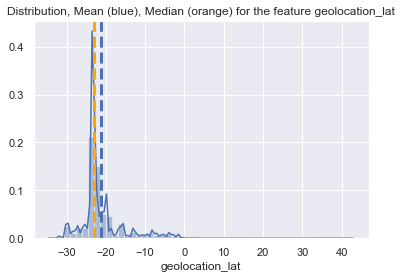

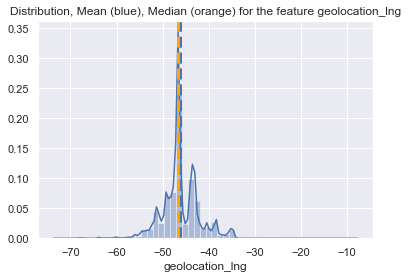

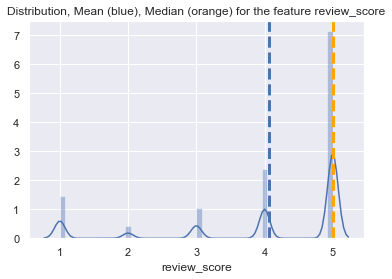

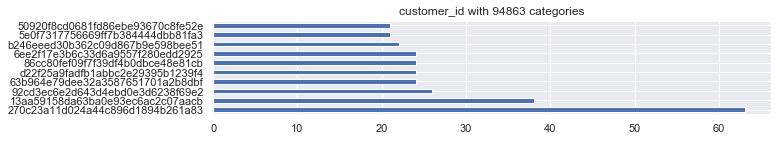

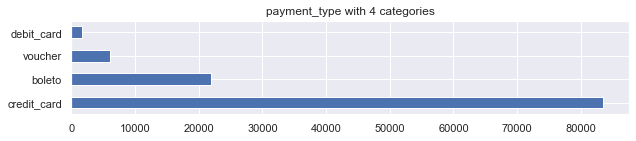

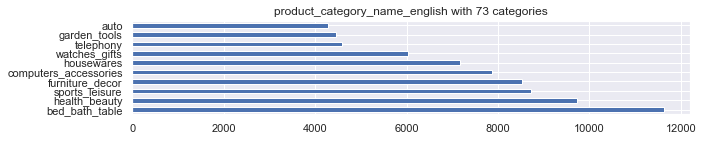

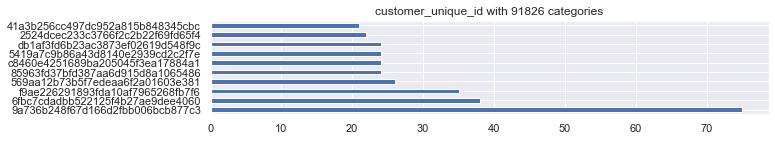

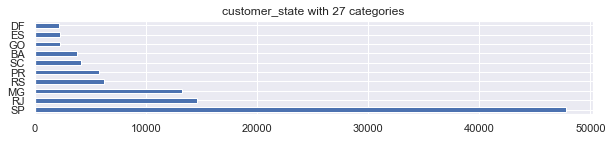

,customer_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,...,product_width_cm,product_category_name_english,delivered_purchase_Dtime,estimated_delivered_Dtime,customer_unique_id,customer_state,Frequency_in_month,geolocation_lat,geolocation_lng,review_score
0,0a8556ac6be836b46b3e89920d59291c,1,credit_card,8,99.33,1,79.80,19.53,57.0,921.0,...,17.0,home_construction,13.815995,12.266076,708ab75d2a007f0564aedd11139c7708,MG,0.042682,-17.858065,-41.495279,1.0
1,f2c7fc58a9de810828715166c672f10a,1,credit_card,1,24.39,1,17.00,7.39,59.0,1274.0,...,11.0,auto,3.396192,16.144340,a8b9d3a27068454b1c98cc67d4e31e6f,SP,0.042682,-23.471749,-46.636773,5.0
2,25b14b69de0b6e184ae6fe2755e478f9,1,credit_card,1,65.71,1,56.99,8.72,54.0,1536.0,...,21.0,perfumery,6.253310,16.274525,6f70c0b2f7552832ba46eb57b1c5651e,SP,0.042682,-23.457636,-46.656681,5.0
3,7a5d8efaaa1081f800628c30d2b0728f,1,credit_card,8,107.78,1,89.90,17.88,60.0,188.0,...,35.0,bed_bath_table,14.563715,13.933438,87695ed086ebd36f20404c82d20fca87,MG,0.042682,-21.741553,-43.335326,5.0
4,15fd6fb8f8312dbb4674e4518d6fa3b3,1,credit_card,2,128.45,1,113.57,14.88,54.0,120.0,...,33.0,bed_bath_table,11.323333,11.093831,4291db0da71914754618cd789aebcd56,SP,0.085363,-23.019107,-48.010925,5.0


In [2]:
# upload  the dataset
data_full = pd.read_csv('data_cleaned_updated2.csv')

print(data_full.columns.tolist()) #let's have a look at the feature names
Full_Analysis_df(data_full,'Data Full')
data_full.head()

**Just a little statistical test: hi-Square Test: example between 'customer_state': 27 categories ,'payment_type': 4 categories.**

In [3]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
conting_table=pd.crosstab(data_full['customer_state'],data_full['payment_type'])

Observed_Values = conting_table.values 
b=chi2_contingency(conting_table)
Expected_Values = b[3]

no_of_rows=len(conting_table.iloc[:,0])
no_of_columns=len(conting_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

# similar to b[0] :
#chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
#chi_square_statistic = sum(chi_square)
chi_square_statistic = b[0]
critical_value=chi2.ppf(q=1-alpha,df=ddof)
p_value=1.0-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value: # or p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom: 78
Significance level:  0.05
Degree of Freedom:  78
chi-square statistic: 589.27816407875
critical_value: 99.61692732428385
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables


**Remove some outliers and perform an analysis of the features containing numerical values.**

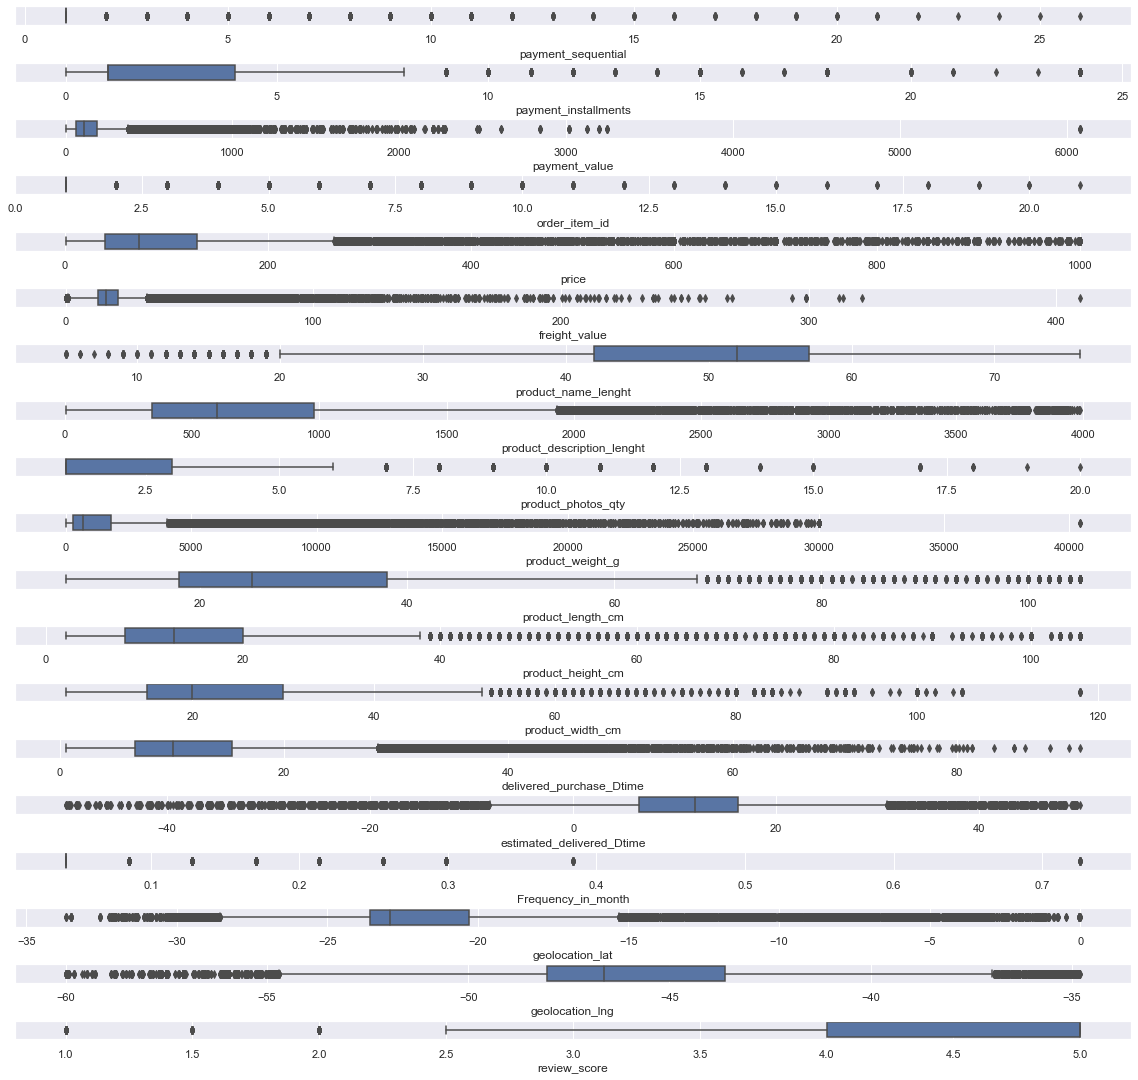

In [3]:
# remove some outiers
data_full = data_full.drop(data_full[(data_full['geolocation_lat'] > 0.0)  
                                     | (data_full['geolocation_lng']< -60 )
                                     | (data_full['price'] > 1000.0 ) 
                                     | (data_full['estimated_delivered_Dtime'] > 50) 
                                     | (data_full['estimated_delivered_Dtime'] < - 50) ].index)
Analysis_non_obj_df(data_full)

**Create subgroups and merge them into finaly two groups: 'Home' and 'leisure_fashion_n_beauty'. This strategy enables to perform clustering with different numbers of subgroups if needed. The type of payment is also divided into two groups: payment by card ord payment by cash or vouchers.**

In [4]:
# Feature Engineering
# Reducing granularity of the product name category
data_full.replace({'product_category_name_english': 'agro_industry_and_commerce'}, 
                  {'product_category_name_english': 'Indus'}, inplace =True)
data_full.replace({'product_category_name_english': 'industry_commerce_and_business'}, 
                  {'product_category_name_english': 'Indus'}, inplace =True)
data_full.replace({'product_category_name_english': 'office_furniture'}, 
                  {'product_category_name_english': 'Indus'}, inplace =True)
data_full.replace({'product_category_name_english': 'market_place'}, 
                  {'product_category_name_english': 'Indus'}, inplace =True)

data_full.replace({'product_category_name_english': 'air_conditioning'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'home_appliances'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'home_appliances_2'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'home_comfort_2'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'home_confort'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'home_construction'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'housewares'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'small_appliances'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'small_appliances_home_oven_and_coffee'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'telephony'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'fixed_telephony'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)

data_full.replace({'product_category_name_english': 'arts_and_craftmanship'}, 
                  {'product_category_name_english': 'art_stationery'}, inplace =True)
data_full.replace({'product_category_name_english': 'stationery'}, 
                  {'product_category_name_english': 'art_stationery'}, inplace =True)
data_full.replace({'product_category_name_english': 'art'}, 
                  {'product_category_name_english': 'art_stationery'}, inplace =True)

data_full.replace({'product_category_name_english': 'baby'}, 
                  {'product_category_name_english': 'beauty_n_baby'}, inplace =True)
data_full.replace({'product_category_name_english': 'diapers_and_hygiene'}, 
                  {'product_category_name_english': 'beauty_n_baby'}, inplace =True)
data_full.replace({'product_category_name_english': 'health_beauty'}, 
                  {'product_category_name_english': 'beauty_n_baby'}, inplace =True)
data_full.replace({'product_category_name_english': 'perfumery'}, 
                  {'product_category_name_english': 'beauty_n_baby'}, inplace =True)
#book
data_full.replace({'product_category_name_english': 'books_general_interest'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)
data_full.replace({'product_category_name_english': 'books_imported'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)
data_full.replace({'product_category_name_english': 'books_technical'}, 
                  {'product_category_name_english': 'culture'}, inplace =True) 

# audio_movie
data_full.replace({'product_category_name_english': 'cds_dvds_musicals'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)
data_full.replace({'product_category_name_english': 'cine_photo'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)
data_full.replace({'product_category_name_english': 'dvds_blu_ray'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)
data_full.replace({'product_category_name_english': 'audio'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)
data_full.replace({'product_category_name_english': 'music'}, 
                  {'product_category_name_english': 'culture'}, inplace =True)

data_full.replace({'product_category_name_english': 'christmas_supplies'}, 
                  {'product_category_name_english': 'party'}, inplace =True)
data_full.replace({'product_category_name_english': 'party_supplies'}, 
                  {'product_category_name_english': 'party'}, inplace =True)
data_full.replace({'product_category_name_english': 'cool_stuff'}, 
                  {'product_category_name_english': 'party'}, inplace =True)

data_full.replace({'product_category_name_english': 'musical_instruments'}, 
                  {'product_category_name_english': 'electro_n_instru'}, inplace =True)
data_full.replace({'product_category_name_english': 'computers'}, 
                  {'product_category_name_english': 'electro_n_instru'}, inplace =True)
data_full.replace({'product_category_name_english': 'computers_accessories'}, 
                  {'product_category_name_english': 'electro_n_instru'}, inplace =True)
data_full.replace({'product_category_name_english': 'electronics'}, 
                  {'product_category_name_english': 'electro_n_instru'}, inplace =True)
data_full.replace({'product_category_name_english': 'tablets_printing_image'}, 
                  {'product_category_name_english': 'electro_n_instru'}, inplace =True)


data_full.replace({'product_category_name_english': 'consoles_games'}, 
                  {'product_category_name_english': 'game_sports'}, inplace =True)
data_full.replace({'product_category_name_english': 'pc_gamer'}, 
                  {'product_category_name_english': 'game_sports'}, inplace =True)
data_full.replace({'product_category_name_english': 'toys'}, 
                  {'product_category_name_english': 'game_sports'}, inplace =True)
data_full.replace({'product_category_name_english': 'sports_leisure'}, 
                  {'product_category_name_english': 'game_sports'}, inplace =True)

data_full.replace({'product_category_name_english': 'construction_tools_construction'}, 
                  {'product_category_name_english': 'construction'}, inplace =True)
data_full.replace({'product_category_name_english': 'construction_tools_lights'}, 
                  {'product_category_name_english': 'construction'}, inplace =True)
data_full.replace({'product_category_name_english': 'construction_tools_safety'}, 
                  {'product_category_name_english': 'construction'}, inplace =True)
data_full.replace({'product_category_name_english': 'costruction_tools_garden'}, 
                  {'product_category_name_english': 'construction'}, inplace =True)
data_full.replace({'product_category_name_english': 'costruction_tools_tools'}, 
                  {'product_category_name_english': 'construction'}, inplace =True)

# there is originaly a category called 'food_drink'
data_full.replace({'product_category_name_english': 'drinks'}, 
                  {'product_category_name_english': 'food_drink'}, inplace =True)
data_full.replace({'product_category_name_english': 'food'}, 
                  {'product_category_name_english': 'food_drink'}, inplace =True)

data_full.replace({'product_category_name_english': 'fashio_female_clothing'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'fashion_bags_accessories'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'fashion_childrens_clothes'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'fashion_male_clothing'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'fashion_shoes'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'fashion_sport'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'fashion_underwear_beach'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'luggage_accessories'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)
data_full.replace({'product_category_name_english': 'watches_gifts'}, 
                  {'product_category_name_english': 'clothing_shoes_accessories'}, inplace =True)

data_full.replace({'product_category_name_english': 'flowers'}, 
                  {'product_category_name_english': 'flower_pet'}, inplace =True)
data_full.replace({'product_category_name_english': 'garden_tools'}, 
                  {'product_category_name_english': 'flower_pet'}, inplace =True)
data_full.replace({'product_category_name_english': 'pet_shop'}, 
                  {'product_category_name_english': 'flower_pet'}, inplace =True)

data_full.replace({'product_category_name_english': 'bed_bath_table'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'furniture_bedroom'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'furniture_decor'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'furniture_living_room'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'furniture_mattress_and_upholstery'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'kitchen_dining_laundry_garden_furniture'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'la_cuisine'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)
data_full.replace({'product_category_name_english': 'portable_kitchen_and_food_preparers'}, 
                  {'product_category_name_english': 'Furniture'}, inplace =True)

data_full.replace({'product_category_name_english': 'security_and_services'}, 
                  {'product_category_name_english': 'security'}, inplace =True)
data_full.replace({'product_category_name_english': 'signaling_and_security'}, 
                  {'product_category_name_english': 'security'}, inplace =True)

#merge Fashion and Beauty
data_full.replace({'product_category_name_english': 'beauty_n_baby'}, 
                  {'product_category_name_english': 'fashion_n_beauty'}, inplace =True)
data_full.replace({'product_category_name_english': 'clothing_shoes_accessories'}, 
                  {'product_category_name_english': 'fashion_n_beauty'}, inplace =True)

#merge some groups with Home
data_full.replace({'product_category_name_english': 'party'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'construction'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'security'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'Furniture'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'Indus'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)
data_full.replace({'product_category_name_english': 'food_drink'}, 
                  {'product_category_name_english': 'Home'}, inplace =True)

#merge with  leisure
data_full.replace({'product_category_name_english': 'game_sports'}, 
                  {'product_category_name_english': 'leisure'}, inplace =True)
data_full.replace({'product_category_name_english': 'culture'}, 
                  {'product_category_name_english': 'leisure'}, inplace =True)
data_full.replace({'product_category_name_english': 'art_stationery'}, 
                  {'product_category_name_english': 'leisure'}, inplace =True)
data_full.replace({'product_category_name_english': 'electro_n_instru'}, 
                  {'product_category_name_english': 'leisure'}, inplace =True)
data_full.replace({'product_category_name_english': 'flower_pet'}, 
                  {'product_category_name_english': 'leisure'}, inplace =True)
data_full.replace({'product_category_name_english': 'auto'}, 
                  {'product_category_name_english': 'leisure'}, inplace =True)

data_full.replace({'product_category_name_english': 'fashion_n_beauty'}, 
                  {'product_category_name_english': 'leisure_fashion_n_beauty'}, inplace =True)
data_full.replace({'product_category_name_english': 'leisure'}, 
                  {'product_category_name_english': 'leisure_fashion_n_beauty'}, inplace =True)


data_full.replace({'payment_type': 'credit_card'}, 
                  {'payment_type': 'card'}, inplace =True)
data_full.replace({'payment_type': 'debit_card'}, 
                  {'payment_type': 'card'}, inplace =True)

data_full.replace({'payment_type': 'boleto'}, 
                  {'payment_type': 'cash_voucher'}, inplace =True)
data_full.replace({'payment_type': 'voucher'}, 
                  {'payment_type': 'cash_voucher'}, inplace =True)

data_full['product_category_name_english'].unique()

array(['Home', 'leisure_fashion_n_beauty'], dtype=object)

**Only keeping certain features for the clustering. Selection if done considering their meaningfulness.**

In [5]:
data_full_inter1 = data_full.drop(columns=['customer_id'])
data_full_inter = data_full_inter1.drop(columns=['payment_value',
                                                'product_name_lenght', 
                                                'product_description_lenght',
                                                'product_weight_g',
                                                'product_length_cm', 
                                                'product_height_cm', 
                                                'product_width_cm',
                                                'delivered_purchase_Dtime',
                                                'freight_value',
                                                'product_photos_qty',
                                                'order_item_id',
                                                'payment_sequential',
                                                'payment_installments',
                                                 'payment_type'])


data = data_full_inter.copy()
data_dum= pd.get_dummies(data, prefix=['pcn'],columns = ['product_category_name_english'])
data_dum

,price,estimated_delivered_Dtime,customer_unique_id,customer_state,Frequency_in_month,geolocation_lat,geolocation_lng,review_score,pcn_Home,pcn_leisure_fashion_n_beauty
0,79.80,12.266076,708ab75d2a007f0564aedd11139c7708,MG,0.042682,-17.858065,-41.495279,1.0,1,0
1,17.00,16.144340,a8b9d3a27068454b1c98cc67d4e31e6f,SP,0.042682,-23.471749,-46.636773,5.0,0,1
2,56.99,16.274525,6f70c0b2f7552832ba46eb57b1c5651e,SP,0.042682,-23.457636,-46.656681,5.0,0,1
3,89.90,13.933438,87695ed086ebd36f20404c82d20fca87,MG,0.042682,-21.741553,-43.335326,5.0,1,0
4,113.57,11.093831,4291db0da71914754618cd789aebcd56,SP,0.085363,-23.019107,-48.010925,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...
113085,179.80,20.271898,13f283df2f4760f22b57830865761d07,PR,0.042682,-25.490652,-54.557366,5.0,0,1
113086,297.00,18.451493,b6027ac07fb76ebca8c97b1887865aee,SP,0.042682,-23.073803,-46.556578,5.0,1,0
113087,79.00,19.065324,53b30ca78efb2b7efcd3f9e461587eb2,MG,0.085363,-19.950788,-43.918388,5.0,0,1
113088,349.00,2.054329,b84dc68f02f122a88d7e7bbd37b06204,RJ,0.042682,-22.906016,-43.364980,5.0,0,1


**Implement actions to be performed on the features while performing the grouby by client.**

In [6]:
filter_col = [col for col in data_dum if col.startswith('pcn') | col.startswith('payment')]

dict_tot = { i : 'sum' for i in filter_col }
dict_tot.update( {'review_score' : 'mean',
                  'price':'sum',
                  'estimated_delivered_Dtime':'mean',
                  'Frequency_in_month': 'mean', 
                  'geolocation_lat':'mean', 
                  'geolocation_lng':'mean'})
#dict_tot

data_grb = (data_dum.groupby(['customer_unique_id','customer_state'], as_index=False)
            .agg(dict_tot))

data_grb

,customer_unique_id,customer_state,pcn_Home,pcn_leisure_fashion_n_beauty,review_score,price,estimated_delivered_Dtime,Frequency_in_month,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,1,0,5.0,129.90,4.132905,0.042682,-23.340235,-46.830140
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,0,1,4.0,18.90,4.248125,0.042682,-23.559115,-46.787626
2,0000f46a3911fa3c0805444483337064,SC,0,1,3.0,69.00,1.389734,0.042682,-27.542880,-48.633426
3,0000f6ccb0745a6a4b88665a16c9f078,PA,1,0,4.0,25.99,11.108970,0.042682,-1.312214,-48.483159
4,0004aac84e0df4da2b147fca70cf8255,SP,1,0,5.0,180.00,7.035463,0.042682,-23.505548,-47.469705
...,...,...,...,...,...,...,...,...,...,...
90440,fffcf5a5ff07b0908bd4e2dbc735a684,PE,0,2,5.0,1570.00,26.609722,0.042682,-8.362511,-36.562343
90441,fffea47cd6d3cc0a88bd621562a9d061,BA,0,1,4.0,64.89,2.063657,0.042682,-12.217395,-38.959308
90442,ffff371b4d645b6ecea244b27531430a,MT,0,1,5.0,89.90,29.468704,0.042682,-11.834552,-55.508110
90443,ffff5962728ec6157033ef9805bacc48,ES,0,1,5.0,115.00,13.503866,0.042682,-21.126568,-41.672806


**Again some checks on the numerical values and removing outliers.**

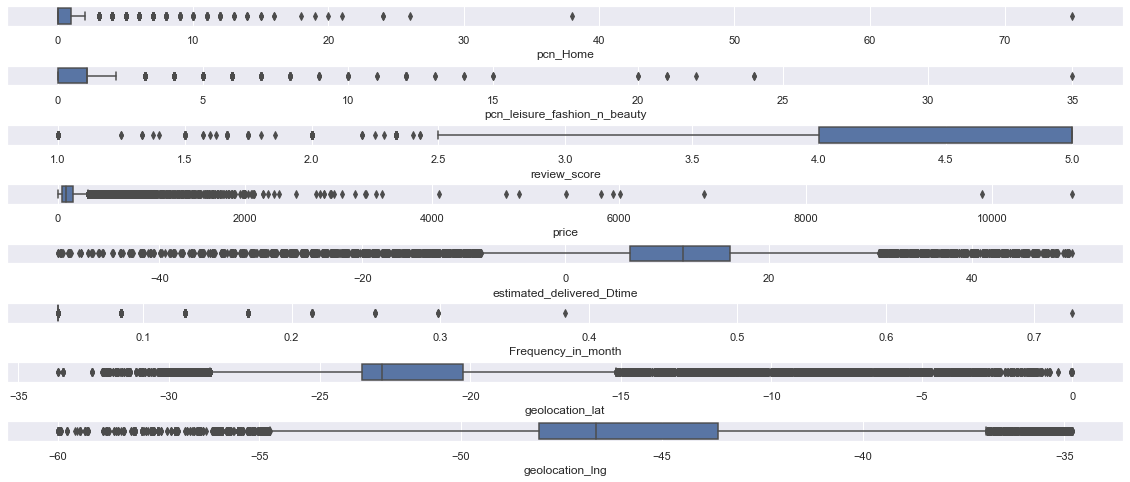

In [14]:
Analysis_non_obj_df(data_grb)

In [7]:
# Remove some outliers on the dataframe describing the clients summep up and averaged behavior
data_grb = data_grb.drop(data_grb[(data_grb['pcn_Home'] > 10.0)  
                                  | (data_grb['pcn_leisure_fashion_n_beauty'] >10.0 )
                                  | (data_grb['price'] > 2000.0 )].index)

**Creation of a feature: the satisfaction which takes into account the average of review score and a score between 1 to 5 which describes the happiness or unhappiness of a client based on the fact that the client received the package before or after the estimated delivery date.**

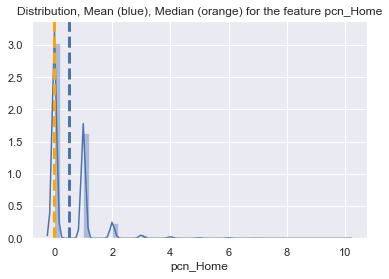

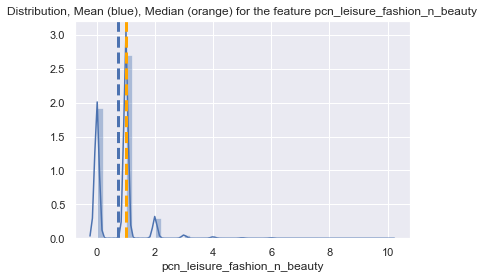

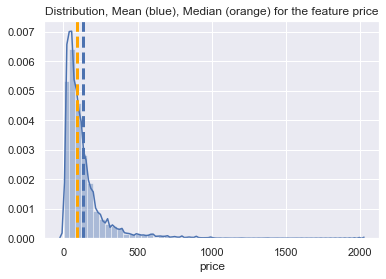

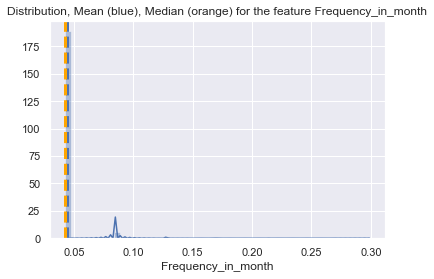

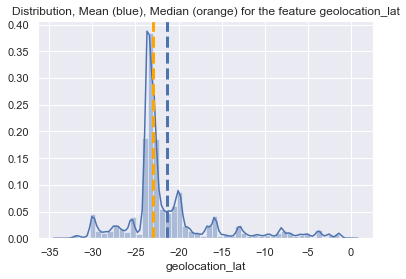

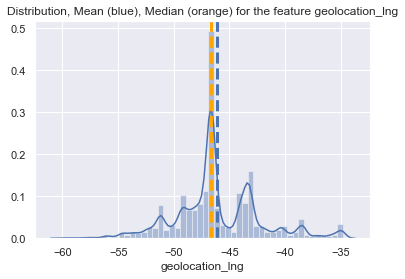

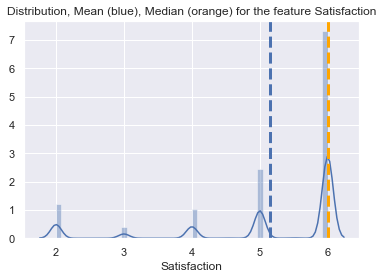

,pcn_Home,pcn_leisure_fashion_n_beauty,price,Frequency_in_month,geolocation_lat,geolocation_lng,Satisfaction
count,90351.000000,90351.000000,90351.000000,90351.000000,90351.000000,90351.000000,90351.000000
mean,0.496353,0.723080,132.482783,0.044223,-21.281731,-46.107069,5.143586
std,0.770000,0.720553,150.612145,0.008968,5.493431,3.882774,1.288269
min,0.000000,0.000000,0.850000,0.042682,-33.689948,-59.999978,2.000000
25%,0.000000,0.000000,48.000000,0.042682,-23.592504,-48.059918,5.000000
50%,0.000000,1.000000,89.900000,0.042682,-22.928999,-46.629904,6.000000
75%,1.000000,1.000000,156.000000,0.042682,-20.223980,-43.606596,6.000000
max,10.000000,10.000000,1999.800000,0.298772,-0.000724,-34.799347,6.000000


In [8]:
#Feature Engineering Satisfaction
data_grb.loc[(data_grb['estimated_delivered_Dtime'] >= 10.0), 'estimated_delivered_Dtime'] = 5.0
data_grb.loc[(data_grb['estimated_delivered_Dtime'] < 10.0) 
             | (data_grb['estimated_delivered_Dtime'] >= 5.0), 'estimated_delivered_Dtime'] = 4.0
data_grb.loc[(data_grb['estimated_delivered_Dtime'] < 5.0) 
             | (data_grb['estimated_delivered_Dtime'] >= 0.0), 'estimated_delivered_Dtime'] = 3.0
data_grb.loc[(data_grb['estimated_delivered_Dtime'] < 0.0) 
             | (data_grb['estimated_delivered_Dtime'] >= -5.0), 'estimated_delivered_Dtime'] = 2.0
data_grb.loc[(data_grb['estimated_delivered_Dtime'] < -5.0) 
             | (data_grb['estimated_delivered_Dtime'] >= -10.0), 'estimated_delivered_Dtime'] = 1.0
data_grb.loc[(data_grb['estimated_delivered_Dtime'] < -10.0), 'estimated_delivered_Dtime'] = 0.0

data_grb['Satisfaction'] = data_grb['estimated_delivered_Dtime']+data_grb['review_score']
data_grb = data_grb.drop(columns=['estimated_delivered_Dtime','review_score'])

# if we want to add another feature the 'payment_card_ratio'
#data_grb['payment_card_ratio'] = data_grb['payment_card']/(data_grb['payment_card']+data_grb['payment_cash_voucher'])
#data_grb = data_grb.drop(columns=['payment_card','payment_cash_voucher'])

Hist_comp_non_obj_df(data_grb)
data_grb.describe()

**Pearson's correlation**

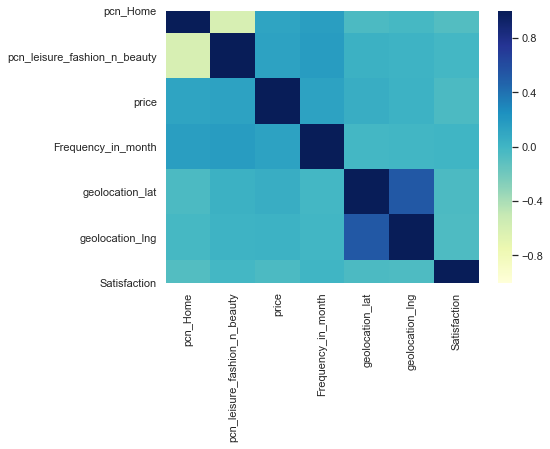

In [128]:
# Normalizer before correlation check
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_full_Nobj = data_grb.select_dtypes(exclude='object')
data_full_MinMax= pd.DataFrame(scaler.fit_transform(data_full_Nobj),
                               columns=data_full_Nobj.columns)

#correlations' study on normalized dataframe excluding objets 
corr_data_full_MinMax = data_full_MinMax.corr()
plt.figure(figsize=(7, 5))
sns.set(font_scale=1)
ax = sns.heatmap(corr_data_full_MinMax, vmin=-1, vmax=1, cmap="YlGnBu")

In [9]:
df1_full = data_grb.drop(columns=['customer_unique_id','customer_state','geolocation_lat','geolocation_lng'])

**Adding new clients who did not make any purchase.**

In [10]:
arr1_new_clients = np.zeros(shape=(9000,df1_full.shape[1]))
df1_new_clients = pd.DataFrame(arr1_new_clients,columns=df1_full.columns)
df1_full_w_new_clients = pd.concat([df1_new_clients, df1_full], ignore_index=True)

# Shuffling
df1_full_comp = df1_full_w_new_clients.sample(frac=1).reset_index(drop=True)

**Create a dataframe with 95% of the samples of the full dataframe to study the clustering stability regarding the introduction of new clients.**

In [11]:
df1 = df1_full_comp.sample(frac=0.95).reset_index(drop=True)

In [12]:
# hypothese les donnes sont centrees
from sklearn import preprocessing
std_scale_1 = preprocessing.StandardScaler().fit(df1)
X1_scaled = std_scale_1.transform(df1)


std_scale_1_comp = preprocessing.StandardScaler().fit(df1_full_comp)
X1_comp_scaled = std_scale_1_comp.transform(df1_full_comp)

**Looking at the required number of vectors to describe in a subspace our partial (95% of the samples) and full dataframes.**

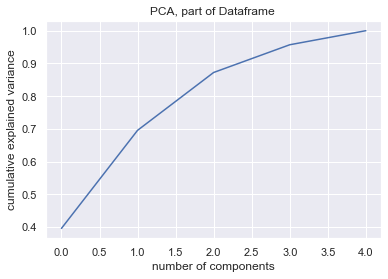

Cumulative explained variation for 2 principalcomponents is : 0.6955007324599325


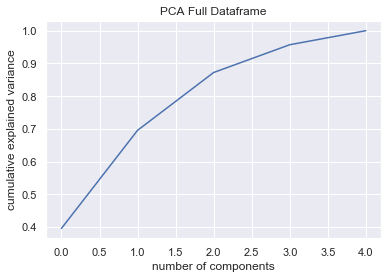

Cumulative explained variation for 2 principalcomponents is : 0.6954165572943993


In [15]:
# show the amont of components required for a specific variance
from sklearn import decomposition
#partial dafaframe study
pca_range = decomposition.PCA().fit(X1_scaled)
plt.figure()
plt.plot(np.cumsum(pca_range.explained_variance_ratio_))
plt.title('PCA, part of Dataframe ')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca = decomposition.PCA(n_components=2)
pca.fit(X1_scaled)
pca_ratios = pca.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca.explained_variance_ratio_.sum()))

#Full dataframe study
pca_range_comp = decomposition.PCA().fit(X1_comp_scaled)
plt.figure()
plt.plot(np.cumsum(pca_range_comp.explained_variance_ratio_))
plt.title('PCA Full Dataframe')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca_comp = decomposition.PCA(n_components=2)
pca_comp.fit(X1_comp_scaled)
pca_ratios_comp = pca_comp.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca_comp.explained_variance_ratio_.sum()))

**Creation of 100 clusters before applying the hierarchical classification.**

In [16]:
from sklearn.cluster import KMeans
# Partial dataframe study
kmeans_X1_100 = KMeans(n_clusters=100, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_X1_100.fit(X1_scaled)

# Full dataframe study
kmeans_X1_100_comp = KMeans(n_clusters=100, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_X1_100_comp.fit(X1_comp_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [17]:
list_km_X1_100=['km_dim_{}'.format(i) for i in range(X1_scaled.shape[1])]
df_km_X1_100 = pd.DataFrame(kmeans_X1_100.cluster_centers_,columns=list_km_X1_100)
df_km_X1_100

list_km_X1_100_comp=['km_dim_{}'.format(i) for i in range(X1_comp_scaled.shape[1])]
df_km_X1_100_comp = pd.DataFrame(kmeans_X1_100_comp.cluster_centers_,columns=list_km_X1_100_comp)
df_km_X1_100_comp

,km_dim_0,km_dim_1,km_dim_2,km_dim_3,km_dim_4
0,-0.603038,0.477047,-0.000436,0.161030,0.167756
1,-0.603474,-0.916106,-0.810908,-2.627617,-2.435475
2,0.733452,-0.916106,-0.117169,0.161030,0.688505
3,-0.550764,1.885179,1.249372,0.161030,-1.084363
4,-0.582861,0.477047,4.058084,0.161030,0.542857
...,...,...,...,...,...
95,10.289997,-0.916106,2.370748,0.367596,0.404068
96,2.070378,-0.903611,0.685115,0.161030,0.560090
97,-0.583218,3.643302,3.120946,0.161030,-0.384377
98,5.018471,-0.880384,0.628957,0.161030,-1.184993


**Looking at the required number of vectors to describe in a subspace of centers of the 100 clusters of the partial and full dataframe.**

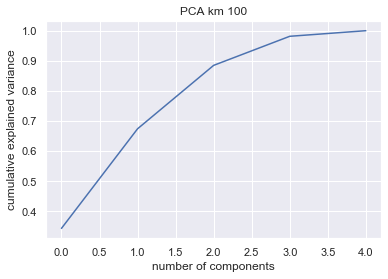

Cumulative explained variation for 2 principalcomponents is : 0.6739276599934764


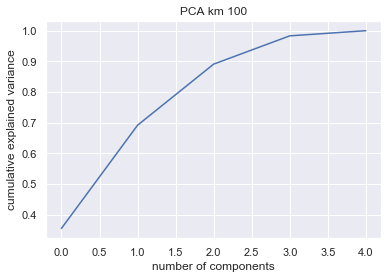

Cumulative explained variation for 2 principalcomponents is : 0.691513242246256


In [18]:
# show the amont of components required for a specific variance
# Partial dataframe study
from sklearn import decomposition
pca_range_km100 = decomposition.PCA().fit(df_km_X1_100)
plt.figure()
plt.plot(np.cumsum(pca_range_km100.explained_variance_ratio_))
plt.title('PCA km 100')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca_km100 = decomposition.PCA(n_components=2,random_state=42)
pca_km100.fit(df_km_X1_100)
pca_ratios = pca_km100.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca_km100.explained_variance_ratio_.sum()))

# Full dataframe study
from sklearn import decomposition
pca_range_km100_comp = decomposition.PCA().fit(df_km_X1_100_comp)
plt.figure()
plt.plot(np.cumsum(pca_range_km100_comp.explained_variance_ratio_))
plt.title('PCA km 100')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca_km100_comp = decomposition.PCA(n_components=2,random_state=42)
pca_km100_comp.fit(df_km_X1_100_comp)
pca_ratios_comp = pca_km100_comp.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca_km100_comp.explained_variance_ratio_.sum()))

**Hierarchical Classification, looking at the optimal number of clusters and at their stability by comparing the results of the partial and the full dataframes.**

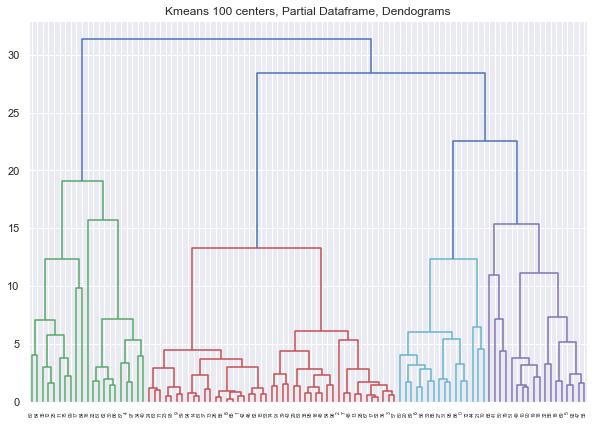

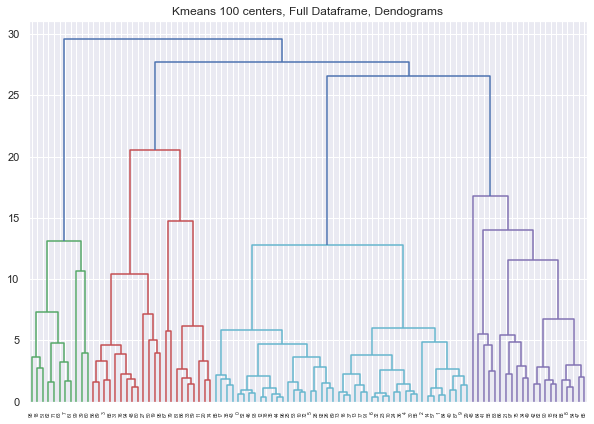

In [35]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Partial Dataframe, Dendograms")
dend = shc.dendrogram(shc.linkage(df_km_X1_100, method='ward'))

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='ward'))

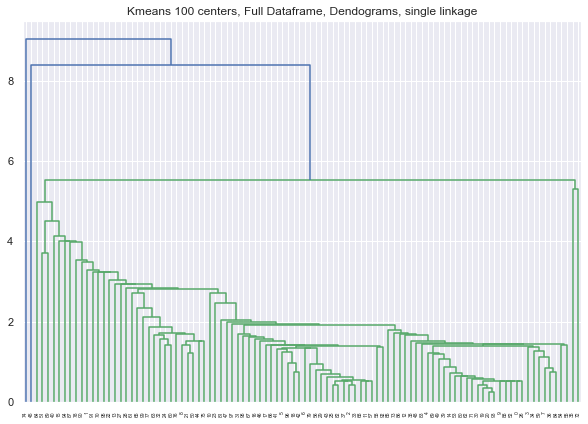

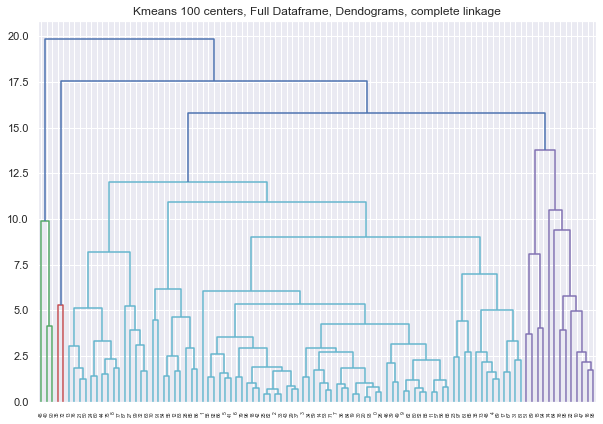

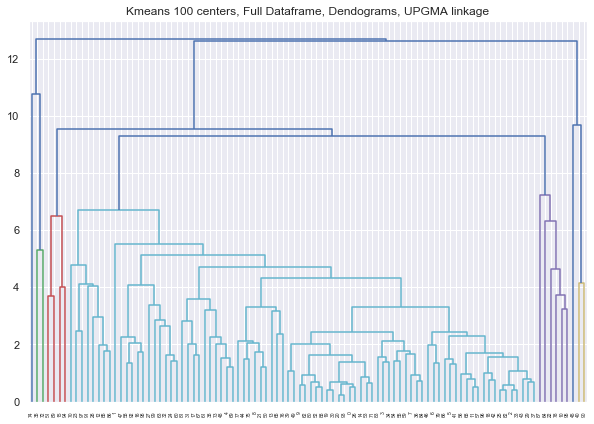

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, single linkage")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='single'))

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, complete linkage")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='complete'))

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, UPGMA linkage")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='average'))

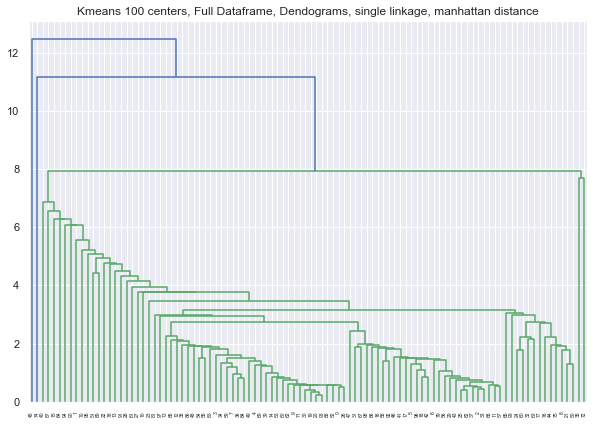

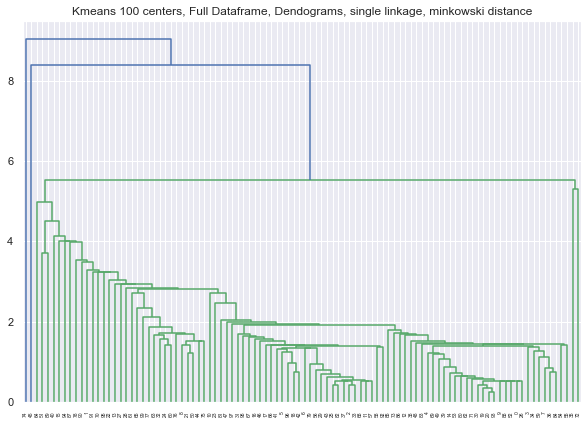

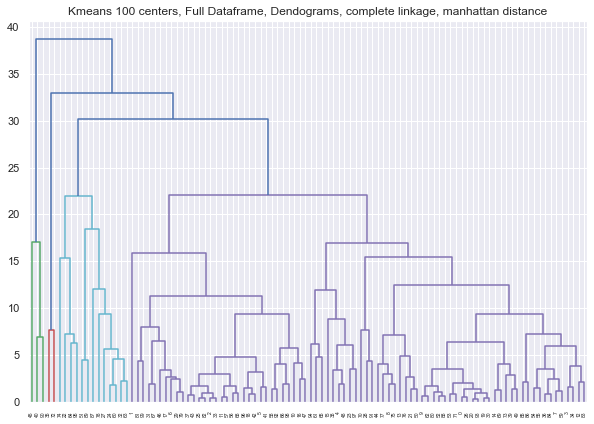

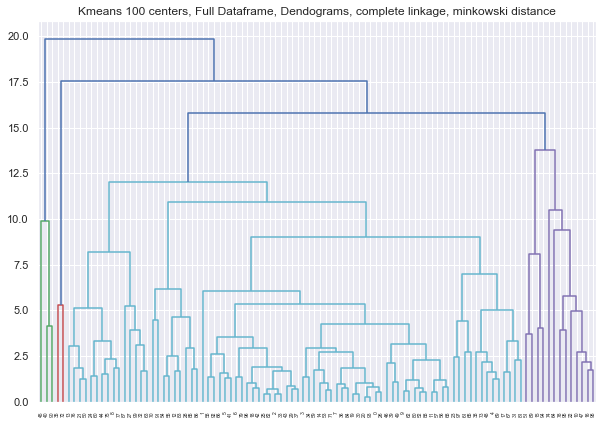

In [24]:
plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, single linkage, manhattan distance")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='single', metric='cityblock'))

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, single linkage, minkowski distance")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='single', metric='minkowski')) 

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, complete linkage, manhattan distance")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='complete', metric='cityblock'))

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms, complete linkage, minkowski distance")
dend_comp = shc.dendrogram(shc.linkage(df_km_X1_100_comp, method='complete', metric='minkowski')) 

**Elbow method on the partial and full dataframes.**

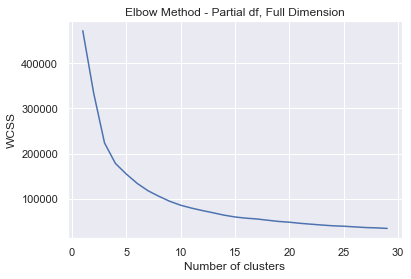

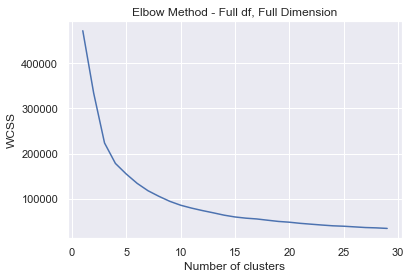

In [16]:
from sklearn.cluster import KMeans
# Partial Dataframe
wcss_fd = []
for i in range(1, 30):
    kmeans_fd  = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_fd .fit(X1_scaled)
    wcss_fd .append(kmeans_fd .inertia_)
plt.plot(range(1, 30), wcss_fd)
plt.title('Elbow Method - Partial df, Full Dimension')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Full Dataframe
wcss_fd_comp = []
for i in range(1, 30):
    kmeans_fd_comp  = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_fd_comp.fit(X1_comp_scaled)
    wcss_fd_comp.append(kmeans_fd_comp.inertia_)
plt.plot(range(1, 30), wcss_fd)
plt.title('Elbow Method - Full df, Full Dimension')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Méthode du coude pour les centres de notre dataframe compléte et partielle (95% des échantillons)

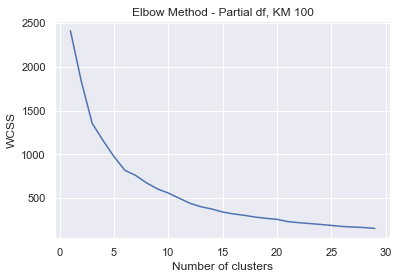

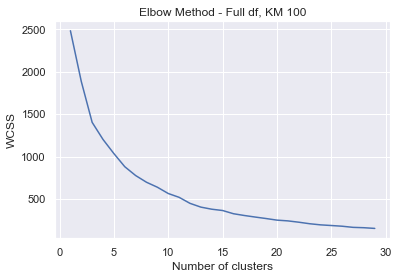

In [39]:
# Partial dataframe
wcss_fd_km100 = []
for i in range(1, 30):
    kmeans_fd_km100  = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_fd_km100.fit(df_km_X1_100)
    wcss_fd_km100.append(kmeans_fd_km100.inertia_)
plt.plot(range(1, 30), wcss_fd_km100)
plt.title('Elbow Method - Partial df, KM 100')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Full dataframe
wcss_fd_km100_comp = []
for i in range(1, 30):
    kmeans_fd_km100_comp  = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_fd_km100_comp.fit(df_km_X1_100_comp)
    wcss_fd_km100_comp.append(kmeans_fd_km100_comp.inertia_)
plt.plot(range(1, 30), wcss_fd_km100_comp)
plt.title('Elbow Method - Full df, KM 100')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The optimal number of clusters is 4. Computation of the 4 clusters.**

In [75]:
# Full Dataframe
kmeans_opt_comp = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_opt_comp.fit(df_km_X1_100_comp)

# Partial Dataframe
kmeans_opt = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_opt.fit(df_km_X1_100)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

**Visualisation of the 4 clusters in a 2D subspace.**

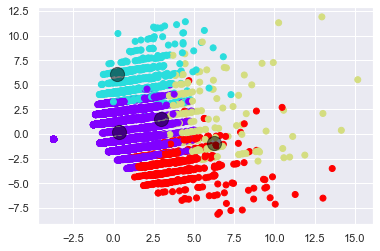

In [74]:
a1 = kmeans_opt_comp.labels_.tolist()
b1 = kmeans_X1_100_comp.labels_.tolist()
c1 =[a1[i] for i in b1] 
label_tot1 = np.array(c1)

X_comp_projected = pca_comp.transform(X1_comp_scaled)
X_projected = pca.transform(X1_scaled)

plt.scatter(X_comp_projected[:, 0],X_comp_projected[:, 1], c=label_tot1, cmap='rainbow')
plt.scatter(kmeans_opt_comp.cluster_centers_[:, 0], kmeans_opt_comp.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
plt.show()

In [77]:
df1_full_comp['Labels'] = label_tot1

,pcn_Home,pcn_leisure_fashion_n_beauty,price,Frequency_in_month,Satisfaction,Labels
0,1.0,0.0,89.99,0.042682,6.0,0
1,1.0,0.0,139.90,0.042682,6.0,0
2,0.0,1.0,499.90,0.042682,5.0,0
3,0.0,1.0,129.99,0.042682,2.0,0
4,1.0,0.0,124.90,0.042682,6.0,0
...,...,...,...,...,...,...
99346,0.0,4.0,239.60,0.042682,6.0,3
99347,0.0,1.0,28.70,0.042682,2.0,0
99348,1.0,0.0,40.00,0.042682,5.0,0
99349,1.0,0.0,29.99,0.042682,4.0,0


In [80]:
# cluster metrics
from sklearn import metrics
def Cluster_metrics(cluster_method_labels,reference_labels,cluster_method_name,X_data):
    df_cluster_metrics = (pd.DataFrame({'Cluster': [cluster_method_name],
                                        'Homogeneity':[metrics.homogeneity_score(reference_labels, cluster_method_labels,)],
                                        'Completness':[metrics.completeness_score(reference_labels, cluster_method_labels,)],
                                        'V-measure':[metrics.v_measure_score(reference_labels, cluster_method_labels,)],
                                        'ARI':[metrics.adjusted_rand_score(reference_labels, cluster_method_labels,)],
                                        'Dav-Bouldin':[metrics.davies_bouldin_score(X_data,cluster_method_labels,)],
                                        'Silhouette':[metrics.silhouette_score(X_data, cluster_method_labels,metric='euclidean')]}))
    return df_cluster_metrics
Cluster_metrics(df1_full_comp['Labels'],df1_full_comp['Labels'],'Kmeans',X_comp_projected)

,Cluster,Homogeneity,Completness,V-measure,ARI,Dav-Bouldin,Silhouette
0,Kmeans,1.0,1.0,1.0,1.0,0.883324,0.54096


In [82]:
#stats for the 4 groups
df1_full_comp.loc[(df1_full_comp['Labels'] == 0)].describe()

,pcn_Home,pcn_leisure_fashion_n_beauty,price,Frequency_in_month,Satisfaction,Labels
count,97374.000000,97374.000000,97374.000000,97374.000000,97374.000000,97374.0
mean,0.412677,0.630066,114.062483,0.039773,4.675451,0.0
std,0.612742,0.619917,131.357335,0.014288,1.928460,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,35.000000,0.042682,4.000000,0.0
50%,0.000000,1.000000,78.000000,0.042682,6.000000,0.0
75%,1.000000,1.000000,143.000000,0.042682,6.000000,0.0
max,4.000000,4.000000,1249.490000,0.085363,6.000000,0.0


In [83]:
df1_full_comp.loc[(df1_full_comp['Labels'] == 1)].describe()

,pcn_Home,pcn_leisure_fashion_n_beauty,price,Frequency_in_month,Satisfaction,Labels
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.0
mean,4.534128,0.034670,433.593304,0.048092,4.567045,1.0
std,1.405627,0.234938,371.413783,0.014346,1.586424,0.0
min,2.000000,0.000000,18.000000,0.042682,2.000000,1.0
25%,4.000000,0.000000,179.295000,0.042682,3.000000,1.0
50%,4.000000,0.000000,329.340000,0.042682,5.000000,1.0
75%,5.000000,0.000000,559.980000,0.042682,6.000000,1.0
max,10.000000,3.000000,1996.000000,0.128045,6.000000,1.0


In [84]:
df1_full_comp.loc[(df1_full_comp['Labels'] == 2)].describe()

,pcn_Home,pcn_leisure_fashion_n_beauty,price,Frequency_in_month,Satisfaction,Labels
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.0
mean,1.929907,1.719626,325.117056,0.141009,5.354420,2.0
std,1.920911,1.480987,224.640695,0.032468,0.915639,0.0
min,0.000000,0.000000,20.700000,0.085363,2.000000,2.0
25%,0.000000,0.000000,149.850000,0.128045,5.000000,2.0
50%,2.000000,2.000000,275.945000,0.128045,5.775000,2.0
75%,3.000000,3.000000,446.525000,0.128045,6.000000,2.0
max,9.000000,7.000000,1202.730000,0.298772,6.000000,2.0


In [85]:
df1_full_comp.loc[(df1_full_comp['Labels'] == 3)].describe()

,pcn_Home,pcn_leisure_fashion_n_beauty,price,Frequency_in_month,Satisfaction,Labels
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.0
mean,0.076190,4.260714,468.392929,0.057366,4.880454,3.0
std,0.599089,1.411642,450.047901,0.024013,1.430726,0.0
min,0.000000,1.000000,17.500000,0.042682,2.000000,3.0
25%,0.000000,3.000000,168.742500,0.042682,4.000000,3.0
50%,0.000000,4.000000,299.500000,0.042682,5.666667,3.0
75%,0.000000,5.000000,569.710000,0.085363,6.000000,3.0
max,10.000000,10.000000,1999.800000,0.170727,6.000000,3.0


**After using the Kmeans++ for computating the 4 clusters, let's the 4 clusters 4 clusters with the agglomerative clustering algorithm.**

In [86]:
from sklearn.cluster import AgglomerativeClustering
agg_clu_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clu_ward.fit_predict(df_km_X1_100_comp)

array([3, 3, 3, 0, 3, 3, 3, 1, 2, 3, 3, 0, 3, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3,
       3, 2, 3, 2, 0, 2, 0, 1, 3, 3, 2, 3, 0, 3, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 3, 3, 1, 3, 3, 0, 2, 0, 3, 3, 0, 0, 0, 2, 2, 3, 3, 0, 3,
       2, 0, 2, 3, 3, 3, 0, 0, 3, 2, 1, 1], dtype=int64)

In [93]:
a1_agg_clu_ward = agg_clu_ward.labels_.tolist()
c1_agg_clu_ward =[a1_agg_clu_ward[i] for i in b1] 
label_tot1_agg_clu_ward = np.array(c1_agg_clu_ward)
#len(b1), len(a1_agg_clu_ward), len(c1_agg_clu_ward)

(99351, 100, 99351)

Visualisation dans un sous espace de 2 dimensions des 4 clusters calculés par l'agglomerative clustering

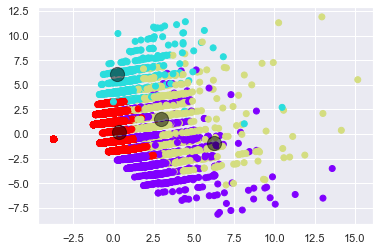

In [94]:
plt.scatter(X_comp_projected[:, 0],X_comp_projected[:, 1], c=label_tot1_agg_clu_ward, cmap='rainbow')
plt.scatter(kmeans_opt_comp.cluster_centers_[:, 0], kmeans_opt_comp.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
plt.show()

In [95]:
df1_full_comp['Labels_agg_clus'] = label_tot1_agg_clu_ward
Cluster_metrics(df1_full_comp['Labels_agg_clus'],df1_full_comp['Labels'],'Agg_clus_ward',X_comp_projected)

,Cluster,Homogeneity,Completness,V-measure,ARI,Dav-Bouldin,Silhouette
0,Agg_clus_ward,0.68092,0.246014,0.36144,0.40971,1.505257,0.357213


**New study  without product categories but with geo latitude and longintude, statisfaction, shopping frequency and price.**

**Similar to previous study for this new dataset and at the end,a study of the TNSE algorithm.**

In [50]:
df2_full = data_grb.drop(columns=['customer_unique_id','customer_state','pcn_Home', 'pcn_leisure_fashion_n_beauty'])

#add new clients without purchase in the dataframe
arr2_new_clients = np.zeros(shape=(9000,df2_full.shape[1]))
df2_new_clients = pd.DataFrame(arr2_new_clients,columns=df2_full.columns)
df2_full_w_new_clients = pd.concat([df2_new_clients, df2_full], ignore_index=True)

# Shuffling
df2_full_comp = df2_full_w_new_clients.sample(frac=1).reset_index(drop=True)

In [53]:
# dataframe contains 95% of the full dataset to study the stability
df2 = df2_full_comp.sample(frac=0.95).reset_index(drop=True)

In [54]:
# assuming the data are centered.
from sklearn import preprocessing
std_scale_2 = preprocessing.StandardScaler().fit(df2)
X2_scaled = std_scale_2.transform(df2)


std_scale_2_comp = preprocessing.StandardScaler().fit(df2_full_comp)
X2_comp_scaled = std_scale_2_comp.transform(df2_full_comp)

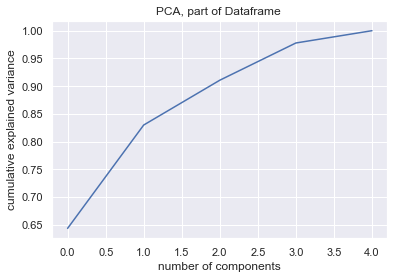

Cumulative explained variation for 2 principalcomponents is : 0.8297428849768365


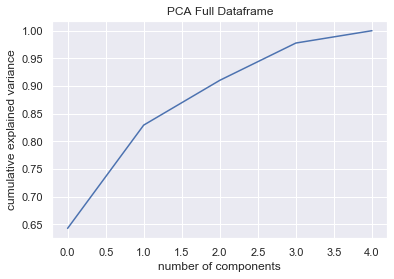

Cumulative explained variation for 2 principalcomponents is : 0.8294221352017697


In [58]:
# show the amont of components required for a specific variance
from sklearn import decomposition
#partial dafaframe study
pca_range2 = decomposition.PCA().fit(X2_scaled)
plt.figure()
plt.plot(np.cumsum(pca_range2.explained_variance_ratio_))
plt.title('PCA, part of Dataframe ')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca2 = decomposition.PCA(n_components=2)
pca2.fit(X2_scaled)
pca_ratios2 = pca2.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca2.explained_variance_ratio_.sum()))

#Full dataframe study
pca_range_comp2 = decomposition.PCA().fit(X2_comp_scaled)
plt.figure()
plt.plot(np.cumsum(pca_range_comp2.explained_variance_ratio_))
plt.title('PCA Full Dataframe')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca_comp2 = decomposition.PCA(n_components=2)
pca_comp2.fit(X2_comp_scaled)
pca_ratios_comp = pca_comp2.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca_comp2.explained_variance_ratio_.sum()))

In [61]:
# Kmeans with 100 clusters to compare with TNSE clustering
# Partial dataframe study
kmeans_X2_100 = KMeans(n_clusters=100, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_X2_100.fit(X2_scaled)

# Full dataframe study
from sklearn.cluster import KMeans
kmeans_X2_100_comp = KMeans(n_clusters=100, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_X2_100_comp.fit(X2_comp_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [62]:
list_km_X2_100=['km_dim_{}'.format(i) for i in range(X2_scaled.shape[1])]
df_km_X2_100 = pd.DataFrame(kmeans_X2_100.cluster_centers_,columns=list_km_X2_100)
df_km_X2_100

list_km_X2_100_comp=['km_dim_{}'.format(i) for i in range(X2_comp_scaled.shape[1])]
df_km_X2_100_comp = pd.DataFrame(kmeans_X2_100_comp.cluster_centers_,columns=list_km_X2_100_comp)
df_km_X2_100_comp

,km_dim_0,km_dim_1,km_dim_2,km_dim_3,km_dim_4
0,-0.238135,0.161030,-1.158115,-0.665770,-1.267656
1,0.109542,0.161030,-0.455526,-0.394544,0.688505
2,-0.810908,-2.627617,2.405080,3.051256,-2.435475
3,5.342029,0.161030,1.494871,0.031655,-1.096627
4,0.356491,0.161030,1.544959,0.359100,0.688505
...,...,...,...,...,...
95,1.750518,0.161030,-0.368343,-0.330198,-1.311605
96,-0.332184,0.161030,1.851778,0.129777,0.688505
97,-0.000325,0.161030,-0.415089,-0.287690,-0.352633
98,4.299790,0.161030,-0.336766,-0.353696,0.563160


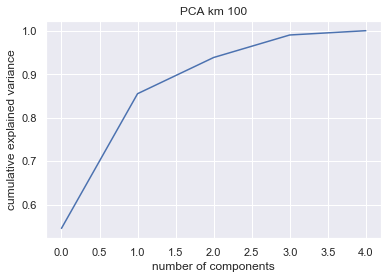

Cumulative explained variation for 2 principalcomponents is : 0.855033729883455


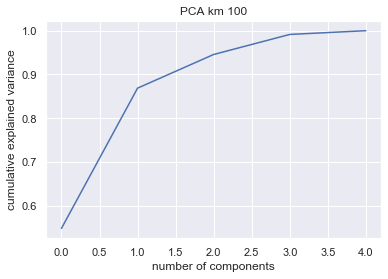

Cumulative explained variation for 2 principalcomponents is : 0.8686596910396627


In [64]:
# show the amont of components required for a specific variance
# Partial dataframe study
from sklearn import decomposition
pca_range2_km100 = decomposition.PCA().fit(df_km_X2_100)
plt.figure()
plt.plot(np.cumsum(pca_range2_km100.explained_variance_ratio_))
plt.title('PCA km 100')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca2_km100 = decomposition.PCA(n_components=2,random_state=42)
pca2_km100.fit(df_km_X2_100)
pca_ratios2 = pca2_km100.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca2_km100.explained_variance_ratio_.sum()))

# Full dataframe study
from sklearn import decomposition
pca_range2_km100_comp = decomposition.PCA().fit(df_km_X2_100_comp)
plt.figure()
plt.plot(np.cumsum(pca_range2_km100_comp.explained_variance_ratio_))
plt.title('PCA km 100')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# limit the study to 2 components
pca2_km100_comp = decomposition.PCA(n_components=2,random_state=42)
pca2_km100_comp.fit(df_km_X2_100_comp)
pca_ratios_comp2 = pca2_km100_comp.explained_variance_ratio_
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca2_km100_comp.explained_variance_ratio_.sum()))

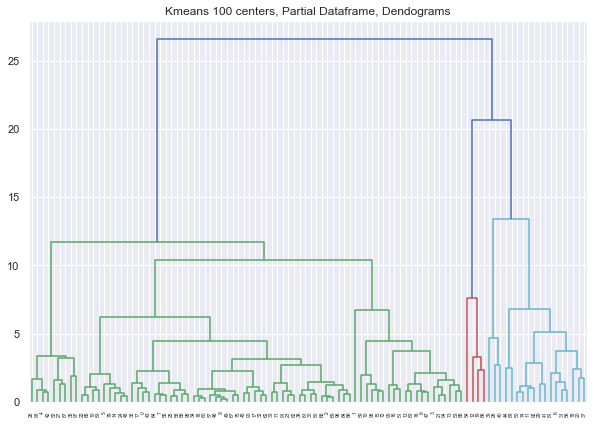

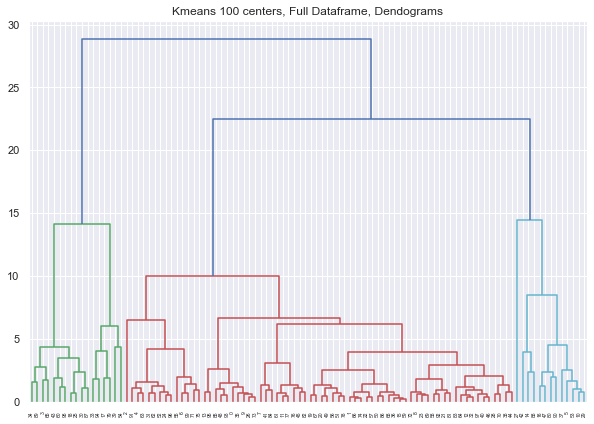

In [66]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Partial Dataframe, Dendograms")
dend = shc.dendrogram(shc.linkage(df_km_X2_100, method='ward'))

plt.figure(figsize=(10, 7))
plt.title("Kmeans 100 centers, Full Dataframe, Dendograms")
dend_comp = shc.dendrogram(shc.linkage(df_km_X2_100_comp, method='ward'))

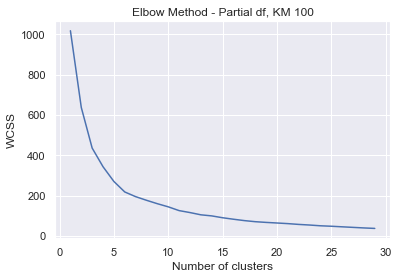

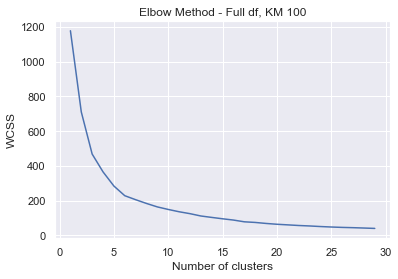

In [68]:
# Partial dataframe
wcss_fd2_km100 = []
for i in range(1, 30):
    kmeans_fd2_km100  = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_fd2_km100.fit(df_km_X2_100)
    wcss_fd2_km100.append(kmeans_fd2_km100.inertia_)
plt.plot(range(1, 30), wcss_fd2_km100)
plt.title('Elbow Method - Partial df, KM 100')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Full dataframe
wcss_fd2_km100_comp = []
for i in range(1, 30):
    kmeans_fd2_km100_comp  = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_fd2_km100_comp.fit(df_km_X2_100_comp)
    wcss_fd2_km100_comp.append(kmeans_fd2_km100_comp.inertia_)
plt.plot(range(1, 30), wcss_fd2_km100_comp)
plt.title('Elbow Method - Full df, KM 100')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
# let's do 3 clusters with the second studied dataframe
# Full Dataframe
kmeans_opt_comp2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_opt_comp2.fit(df_km_X2_100_comp)

# Partial Dataframe
kmeans_opt2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_opt2.fit(df_km_X2_100)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

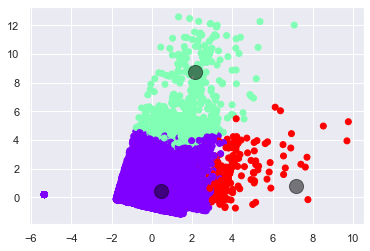

In [72]:
a1_x2 = kmeans_opt_comp2.labels_.tolist()
b1_x2 = kmeans_X2_100_comp.labels_.tolist()
c1_x2 =[a1_x2[i] for i in b1_x2] 
label_tot1_x2 = np.array(c1_x2)

X2_comp_projected = pca_comp2.transform(X2_comp_scaled)
X2_projected = pca2.transform(X2_scaled)

plt.scatter(X2_comp_projected[:, 0],X2_comp_projected[:, 1], c=label_tot1_x2, cmap='rainbow')
plt.scatter(kmeans_opt_comp2.cluster_centers_[:, 0], kmeans_opt_comp2.cluster_centers_[:, 1], s=200, c='black', alpha=0.5)
plt.show()

In [76]:
df2_full_comp['Labels'] = label_tot1_x2
df2_full_comp

,price,Frequency_in_month,geolocation_lat,geolocation_lng,Satisfaction,Labels
0,0.00,0.000000,0.000000,0.000000,0.0,0
1,99.90,0.042682,-18.576408,-46.525986,5.0,0
2,149.90,0.042682,-23.442670,-46.463682,6.0,0
3,89.77,0.042682,-20.925626,-43.620798,3.0,0
4,53.20,0.042682,-22.325549,-49.094331,5.0,0
...,...,...,...,...,...,...
99346,43.99,0.042682,-27.602192,-48.642427,2.0,0
99347,66.99,0.042682,-3.748385,-38.510088,6.0,0
99348,120.00,0.042682,-24.053876,-52.414691,6.0,0
99349,109.99,0.042682,-24.718386,-53.758963,6.0,0


**Computation of 1000 clusters to study their 1000 centers with the TNSE algorithm.**

In [55]:
# Full dataframe study, Kmeans with 1000 clusters, the center will be used for TNSE
from sklearn.cluster import KMeans
kmeans_X2_1000_comp = KMeans(n_clusters=1000, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_X2_1000_comp.fit(X2_comp_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1000, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [74]:
list_km_X2_1000_comp=['km_dim_{}'.format(i) for i in range(X1_comp_scaled.shape[1])]
df_km_X2_1000_comp = pd.DataFrame(kmeans_X2_1000_comp.cluster_centers_,columns=list_km_X2_1000_comp)
df_km_X2_1000_comp

,km_dim_0,km_dim_1,km_dim_2,km_dim_3,km_dim_4
0,-0.810908,-2.627617,2.405080,3.051256,-2.435475
1,0.383256,0.161030,-0.501610,-0.349151,0.167841
2,-0.523860,0.161030,-0.432598,-0.386587,0.688505
3,5.246469,0.161030,-0.468664,-0.276817,0.688505
4,-0.047107,0.161030,1.493574,0.148038,0.688505
...,...,...,...,...,...
995,-0.518556,0.161030,1.165978,0.273655,-0.352822
996,2.979000,0.161030,-0.275495,-0.089705,-0.352822
997,5.596587,0.161030,2.106361,-0.494089,-1.290016
998,0.325301,0.161030,1.474716,0.424087,-0.352822


In [75]:
# Full Dataframe
kmeans_opt_comp2_km_1000to3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_opt_comp2_km_1000to3.fit(df_km_X2_1000_comp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

**The 1000 centers are projected in a  2D subspace.**

In [77]:
# limit the study to 2 components
pca2_km1000_comp = decomposition.PCA(n_components=2,random_state=42)
pca2_km1000_comp.fit(df_km_X2_1000_comp)
pca2_km1000_comp_result = pca2_km1000_comp.transform(df_km_X2_1000_comp)
print('Cumulative explained variation for 2 principalcomponents is : {}'.format(pca2_km1000_comp.explained_variance_ratio_.sum()))

Cumulative explained variation for 2 principalcomponents is : 0.8499568442691192


**Study the TNSE algorithm, convergence study and optimisation of the perplexity. The colors correspond to the 3 labels of the 3 clusters of the Kmeans++ algorithm.**

In [115]:
# https://distill.pub/2016/misread-tsne/
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne_wPCA = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=5000)
tsne_pca_results = tsne_wPCA.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results = tsne_wPCA.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 56.560149908065796 seconds


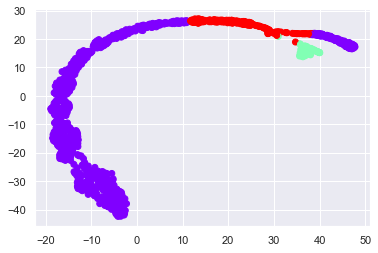

In [116]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [117]:
time_start_it3000  = time.time()
tsne_wPCA_it3000 = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=3000)
tsne_pca_results_it3000  = tsne_wPCA_it3000 .fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000  = tsne_wPCA_it3000 .fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it3000))

t-SNE done! Time elapsed: 25.329232215881348 seconds


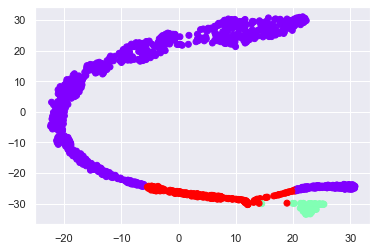

In [118]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it3000[:, 0], tsne_pca_results_it3000[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [119]:
time_start_it1000  = time.time()
tsne_wPCA_it1000 = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
tsne_pca_results_it1000  = tsne_wPCA_it1000 .fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it1000  = tsne_wPCA_it1000 .fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it1000))

t-SNE done! Time elapsed: 12.711681842803955 seconds


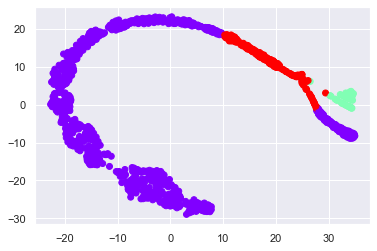

In [120]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it1000[:, 0], tsne_pca_results_it1000[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [121]:
time_start_it5000_perp40  = time.time()
tsne_wPCA_it5000_perp40 = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=5000)
tsne_pca_results_it5000_perp40  = tsne_wPCA_it5000_perp40.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp40  = tsne_wPCA_it3000_perp40.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp40))

t-SNE done! Time elapsed: 54.60727262496948 seconds


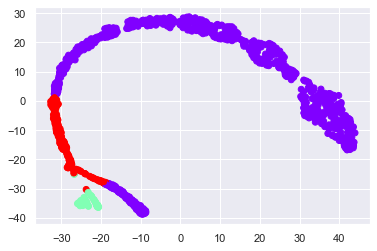

In [122]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it3000_perp40[:, 0], tsne_pca_results_it3000_perp40[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [123]:
time_start_it5000_perp30  = time.time()
tsne_wPCA_it5000_perp30 = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=5000)
tsne_pca_results_it5000_perp30  = tsne_wPCA_it5000_perp30.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp30  = tsne_wPCA_it3000_perp30.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp30))

t-SNE done! Time elapsed: 45.11431813240051 seconds


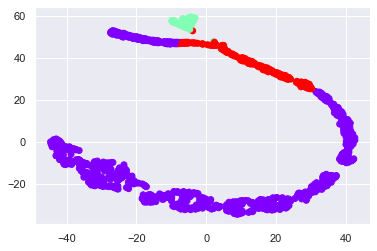

In [124]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it3000_perp30[:, 0], tsne_pca_results_it3000_perp30[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [125]:
time_start_it5000_perp20  = time.time()
tsne_wPCA_it5000_perp20 = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=5000)
#tsne_pca_results_it3000_perp20  = tsne_wPCA_it3000_perp20.fit_transform(df_km_X2_1000_comp)
tsne_pca_results_it5000_perp20  = tsne_wPCA_it5000_perp20.fit_transform(pca2_km1000_comp_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp20))

t-SNE done! Time elapsed: 40.17405557632446 seconds


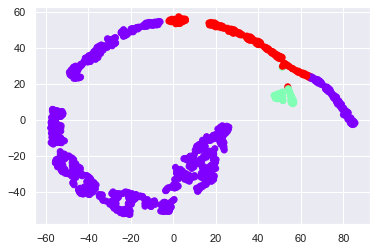

In [126]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it5000_perp20[:, 0], tsne_pca_results_it5000_perp20[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [139]:
time_start_it5000_perp13  = time.time()
tsne_wPCA_it5000_perp13 = TSNE(n_components=2, verbose=0, perplexity=13, n_iter=5000)
tsne_pca_results_it5000_perp13  = tsne_wPCA_it5000_perp13.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp10  = tsne_wPCA_it3000_perp10.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp13))

t-SNE done! Time elapsed: 45.900473833084106 seconds


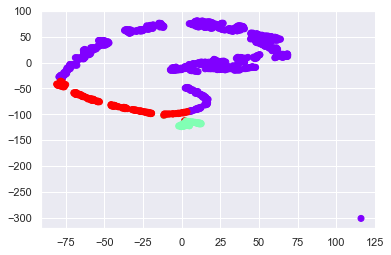

In [140]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it5000_perp13[:, 0], tsne_pca_results_it5000_perp13[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [190]:
time_start_it5000_perp13b  = time.time()
tsne_wPCA_it5000_perp13b = TSNE(n_components=2, verbose=0, perplexity=13, n_iter=5000)
tsne_pca_results_it5000_perp13b  = tsne_wPCA_it5000_perp13b.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp5  = tsne_wPCA_it3000_perp5.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp13b))

t-SNE done! Time elapsed: 43.66919302940369 seconds


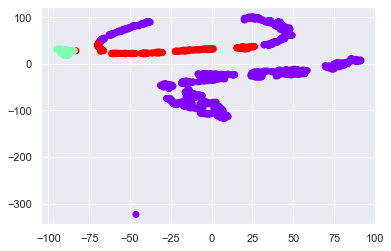

In [191]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it3000_perp13b[:, 0], tsne_pca_results_it3000_perp13b[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [192]:
time_start_it5000_perp13c  = time.time()
tsne_wPCA_it5000_perp13c = TSNE(n_components=2, verbose=0, perplexity=13, n_iter=5000)
tsne_pca_results_it5000_perp13c  = tsne_wPCA_it5000_perp13c.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp5  = tsne_wPCA_it3000_perp5.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp13c))

t-SNE done! Time elapsed: 40.668781757354736 seconds


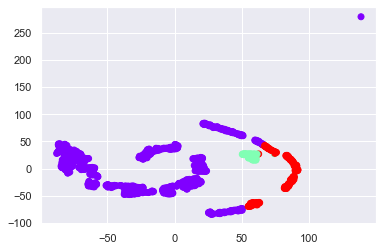

In [193]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it5000_perp13c[:, 0], tsne_pca_results_it5000_perp13c[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

In [194]:
time_start_it5000_perp13d  = time.time()
tsne_wPCA_it5000_perp13d = TSNE(n_components=2, verbose=0, perplexity=13, n_iter=5000)
tsne_pca_results_it5000_perp13d  = tsne_wPCA_it5000_perp13d.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp5  = tsne_wPCA_it3000_perp5.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp13d))

t-SNE done! Time elapsed: 48.160796880722046 seconds


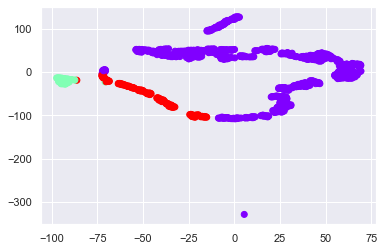

In [195]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it5000_perp13d[:, 0], tsne_pca_results_it5000_perp13d[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

**The perplexity 13 shows a good agreement between the clusters found by the Kmeans++ and the TNSE algorithm.**

In [198]:
time_start_it5000_perp5  = time.time()
tsne_wPCA_it5000_perp5 = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=5000)
tsne_pca_results_it5000_perp5  = tsne_wPCA_it5000_perp5.fit_transform(pca2_km1000_comp_result)
#tsne_pca_results_it3000_perp5  = tsne_wPCA_it3000_perp5.fit_transform(df_km_X2_1000_comp)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start_it5000_perp5))

t-SNE done! Time elapsed: 39.80751705169678 seconds


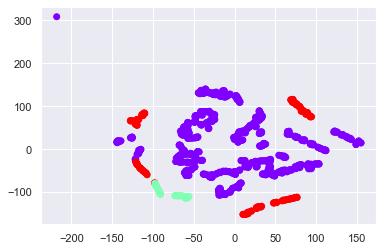

In [199]:
fig, ax = plt.subplots()
ax.scatter(tsne_pca_results_it5000_perp5[:, 0], tsne_pca_results_it5000_perp5[:, 1],c=kmeans_opt_comp2_km_1000to3.labels_, cmap='rainbow')
plt.show()

**Future work: perform clustering for with the feature price, payment_type (as card_payment_ration after feature engineering), satisfaction. Then decide which  clustering display the most significant values related to the features and advice the marketing team. 
Neuronal networks can also be studied to compare their perfomance with Kmeans++, TNSE and hierarchical classification.**